# Hypothesis Testing
Do women fear certain phenomena significantly more than men? Do the left handed people have different interests than right handed?

In [1]:
import math
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("fivethirtyeight")
FIGSIZE = (16, 9)

# Do women fear certain phenomena significantly more than men?

In [16]:
path = "../data/responses_cleaned.csv"
df = pd.read_csv(path, header=0)

phobia_columns = ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes',
               'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']

df_male = df[df["Gender"] == "male"][phobia_columns]
df_female = df[df["Gender"] == "female"][phobia_columns]

print(f"Men:Women = {len(df_male)}:{len(df_female)}")

Men:Women = 411:599


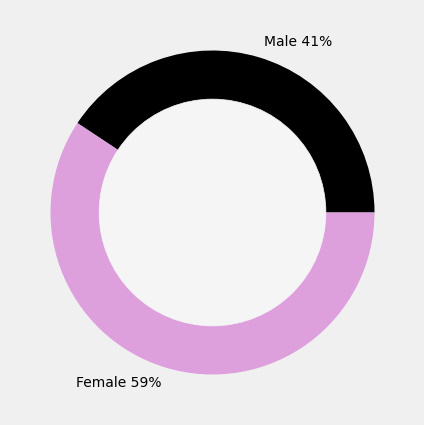

In [130]:
fig = plt.figure(figsize=(5,5))

# Create a pieplot
plt.pie(
    [len(df_male), len(df_female)],
    labels=[
        f"Male {100 * len(df_male) / len(df):.0f}%",
        f"Female {100 * len(df_female) / len(df):.0f}%"
    ],
    colors=["black", "plum"],
    textprops={'fontsize': 10}
)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color="whitesmoke")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

There are more women than men, but the split is close enough for us to use a shared y-axis while plotting the distributions.

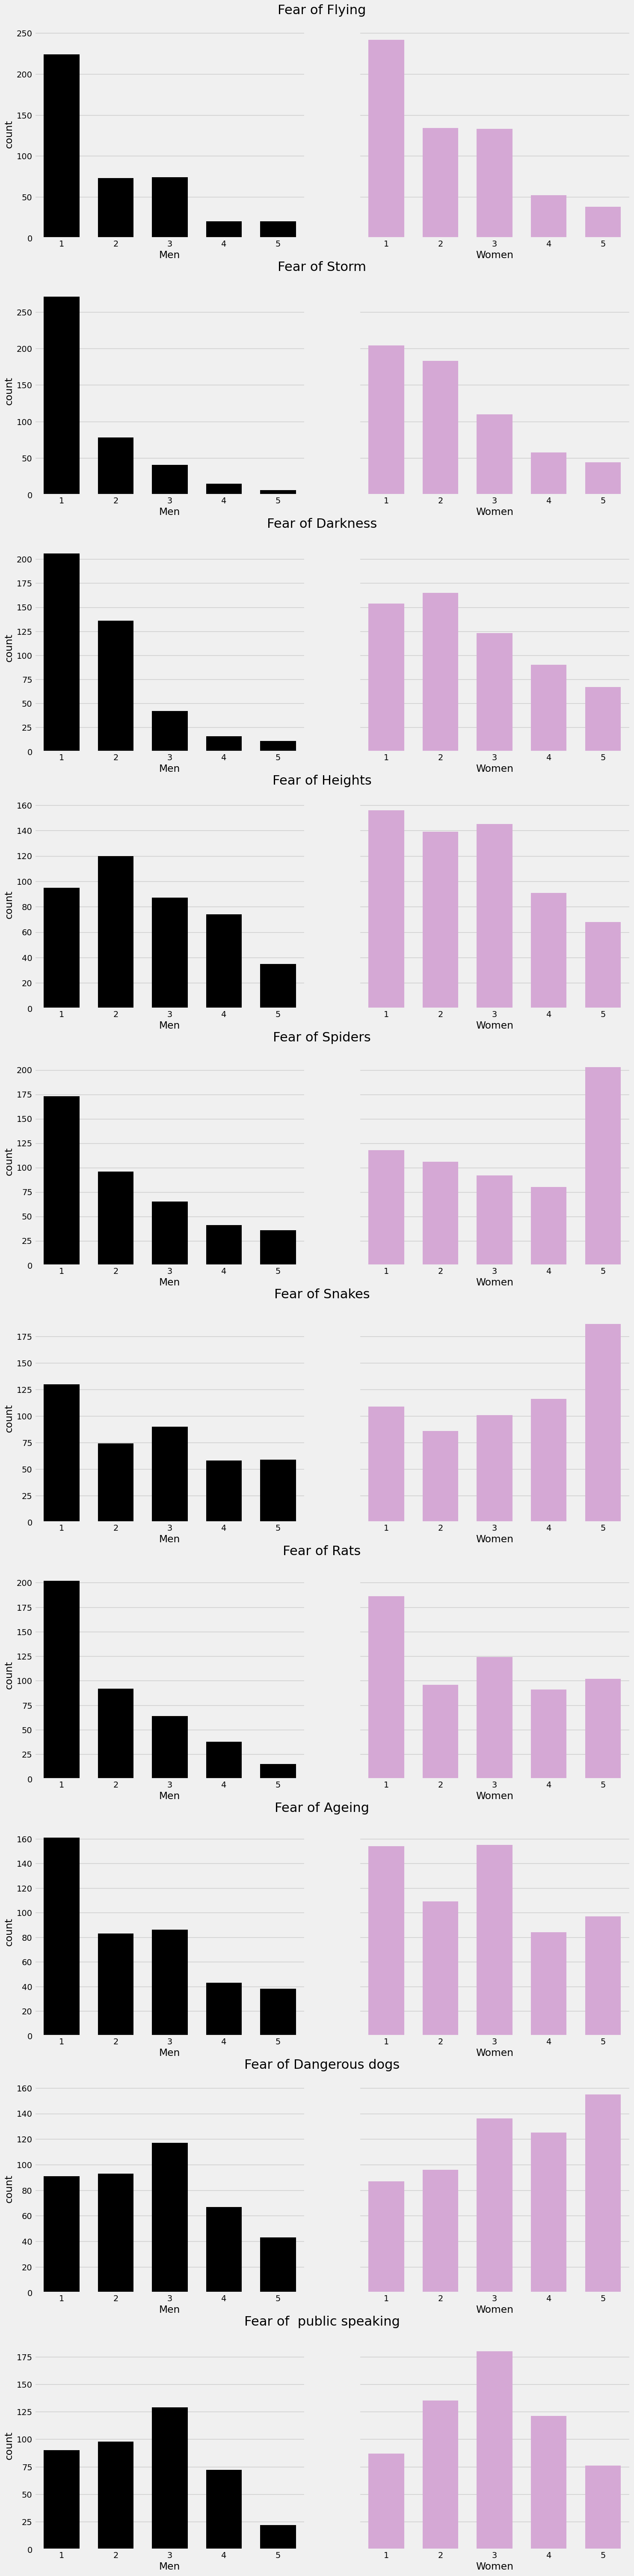

In [131]:
fig = plt.figure(figsize=(FIGSIZE[0], FIGSIZE[1] * len(phobia_columns) // 1.5))

# create phobia x 1 subfigs
subfigs = fig.subfigures(nrows=len(phobia_columns), ncols=1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle(f"Fear of {phobia_columns[row].replace('Fear of', '')}", fontsize=22)

    # create 1x2 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=2, sharey=True)
    sns.countplot(ax=axs[0], data=df_male, x=phobia_columns[row], color="black", width=0.66)
    sns.countplot(ax=axs[1], data=df_female, x=phobia_columns[row], color="plum", width=0.66)
    axs[0].set_xlabel("Men")
    axs[1].set_xlabel("Women")
    axs[1].set_ylabel("")
plt.show()

## Remarks
- In all cases where the distributions diverge, women display a more pronounced fear response than men.
- Women generally demonstrate a stronger fear response to certain stimuli, such as spiders, snakes, rats, dogs, and ageing, than men.
- The prevalence and intensity of other phobias do not seem to differ significantly between genders.

# Do the left handed people have different interests than right handed?

In [100]:
phobia_columns = ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes',
               'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']

df_right = df[df["Left - right handed"] == "right handed"][phobia_columns]
df_left = df[df["Left - right handed"] == "left handed"][phobia_columns]

print(f"Right:Left = {len(df_right)}:{len(df_left)}")

Right:Left = 909:101


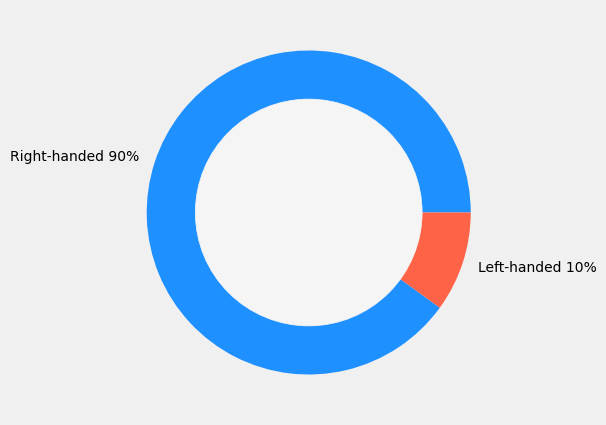

In [117]:
fig = plt.figure(figsize=(5,5))

# Create a pieplot
plt.pie(
    [len(df_right), len(df_left)],
    labels=[
        f"Right-handed {100 * len(df_right) / len(df):.0f}%",
        f"Left-handed {100 * len(df_left) / len(df):.0f}%"
    ],
    colors=["dodgerblue", "tomato"],
    textprops={'fontsize': 10}
)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color="whitesmoke")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

There are overwhelmingly more right-handed people than left-handed people. Hence, we should use seperate y-axes for the two.

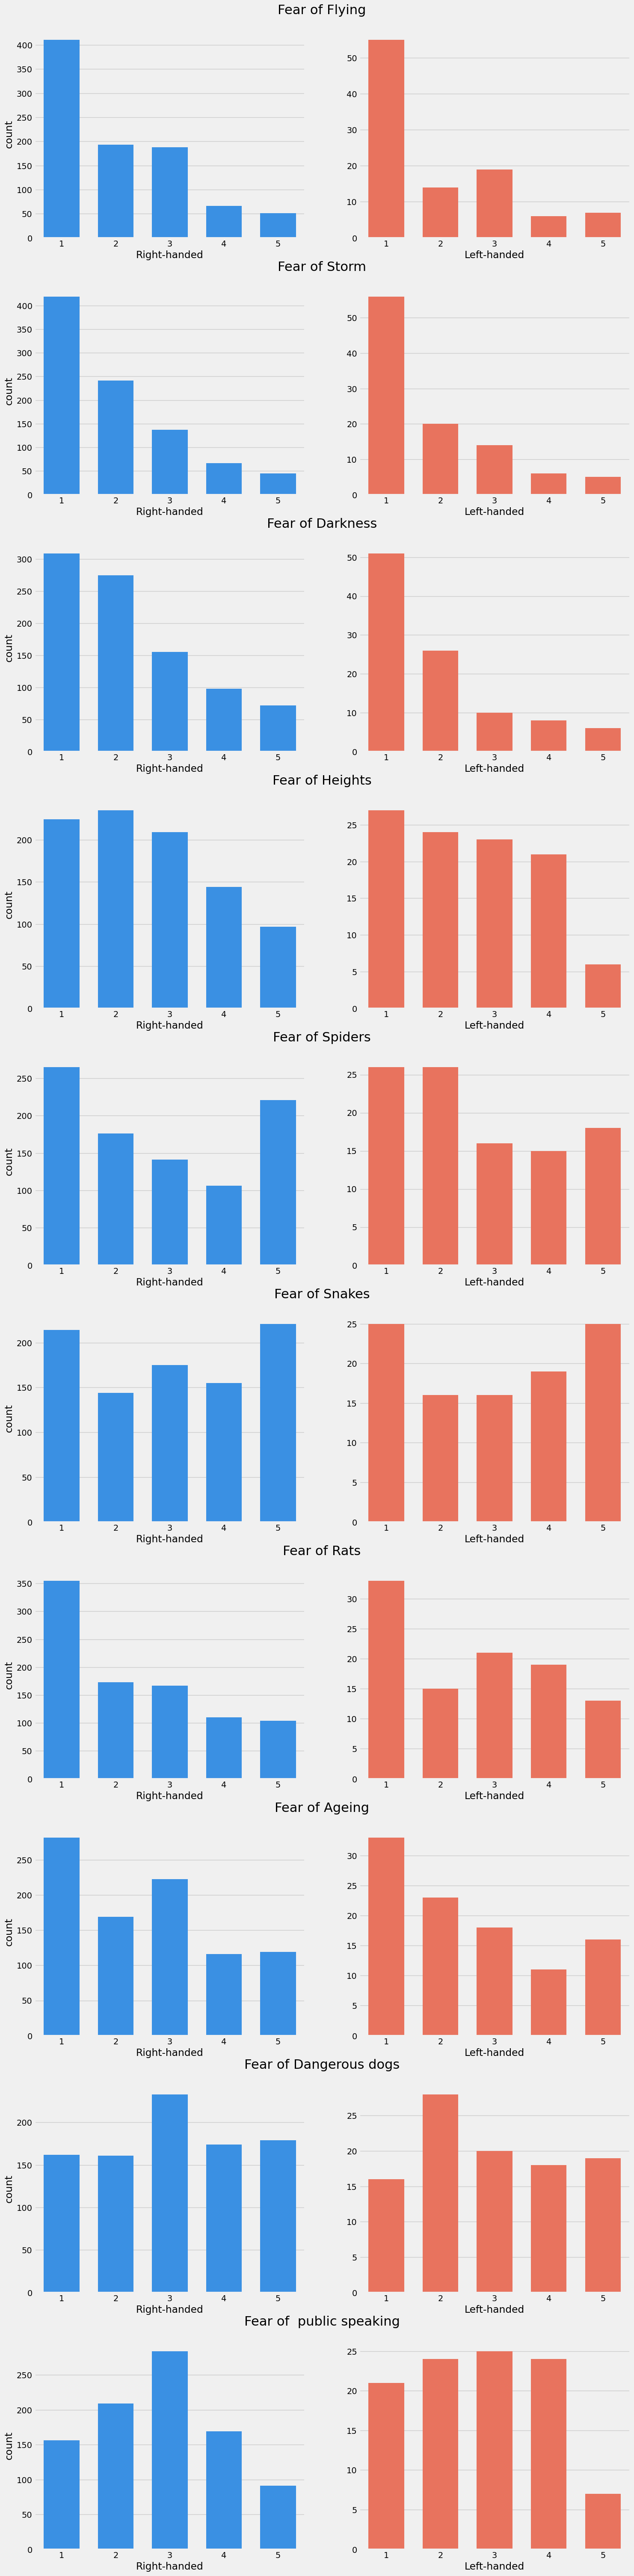

In [116]:
fig = plt.figure(figsize=(FIGSIZE[0], FIGSIZE[1] * len(phobia_columns) // 1.5))

# create phobia x 1 subfigs
subfigs = fig.subfigures(nrows=len(phobia_columns), ncols=1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle(f"Fear of {phobia_columns[row].replace('Fear of', '')}", fontsize=22)

    # create 1x2 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=2, sharey=False)
    sns.countplot(ax=axs[0], data=df_right, x=phobia_columns[row], color="dodgerblue", width=0.66)
    sns.countplot(ax=axs[1], data=df_left, x=phobia_columns[row], color="tomato", width=0.66)
    axs[0].set_xlabel("Right-handed")
    axs[1].set_xlabel("Left-handed")
    axs[1].set_ylabel("")
plt.show()

## Remarks
- There is no significant difference between any of the distributions.